## PyRing hierarchical analysis

## Setup

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os
import seaborn as sns
import utils
from matplotlib.lines import Line2D

sns.set(style='ticks', context='notebook', font='serif', 
        font_scale=1.5, palette='deep')

# ############################################################################
# rcParams

# make plots fit the LaTex column size but rescale them for ease of display
scale_factor = 2

# Get columnsize from LaTeX using \showthe\columnwidth
fig_width_pt = scale_factor*246.0
# Convert pts to inches
inches_per_pt = 1.0/72.27               
# Golden ratio
fig_ratio = (np.sqrt(5)-1.0)/2.0
fig_width = fig_width_pt*inches_per_pt
fig_height =fig_width*fig_ratio

figsize_column = (fig_width, fig_height)
figsize_square = (fig_width, fig_width)

fig_width_page = scale_factor*inches_per_pt*508.87
figsize_page = (fig_width_page, fig_height)

rcParams = {'figure.figsize': figsize_column}

# LaTex text font sizse in points (rescaled as above)
fs = scale_factor*9
fs_label = 0.8*fs
rcParams['axes.labelsize'] = fs
rcParams['legend.fontsize'] = fs
rcParams['xtick.labelsize'] = fs_label
rcParams['ytick.labelsize'] = fs_label
rcParams["text.usetex"] = "true"

numpy.random.seed(1234)

# ignore seaborn warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
input_path = {
                'GWTC-2' : 'Hierarchical_gwtc2/domega_221_pop.txt.gz',
                'GWTC-3' : 'Hierarchical_gwtc3/domega_221_pop.txt.gz'
             }

runs = ['GWTC-3','GWTC-2']

## Plots

In [5]:
data = np.genfromtxt(input_path['GWTC-2'])

In [6]:
data

array([-0.00823928,  0.09456171,  0.00037565, ...,  0.00611249,
        0.1386262 ,  0.2671646 ])

(array([   5.,    8.,   44.,  162.,  848., 1923.,  886.,  100.,   18.,
           6.]),
 array([-1.08132168, -0.87579904, -0.6702764 , -0.46475376, -0.25923111,
        -0.05370847,  0.15181417,  0.35733681,  0.56285945,  0.7683821 ,
         0.97390474]),
 <BarContainer object of 10 artists>)

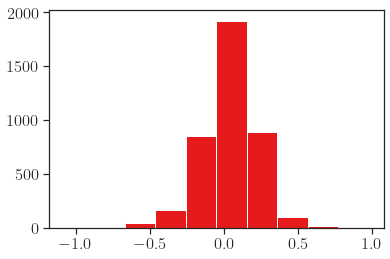

In [7]:
plt.hist(data)

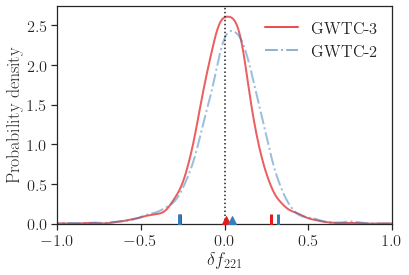

In [4]:
xlim = [-1.0, 1.0]

sns.set_palette('Set1')

kws = {
    'GWTC-3': {
        'ls': '-',
        'alpha': 0.7,
        'lw': 2,
        'label': 'GWTC-3',
    },
    'GWTC-2': {
        'ls': '-.',
        'alpha': 0.5,
        'lw': 2,
        'label': 'GWTC-2',
    },
}

ul_run = runs[0]
lines = {v.pop('label'): Line2D([0], [0], c='gray', **v)
         for v in kws.values()}

for i,run in enumerate(kws.keys()):
        
    samples = np.genfromtxt(input_path[run])
    c = sns.color_palette()[i]

    sns.distplot(samples, label=run, hist=False,
                 kde_kws={'gridsize': 500, **kws[run]},
                 hist_kws={'range': xlim}, color=c)

    # add credible interval
    lkws = {'ls': 'none', 'c': c, 'zorder': 3}
    plot([np.percentile(samples, 5), np.percentile(samples, 95)], [0.0,0.0], marker='|', ms=20, mew=3, mfc='none', **lkws)
    plot(np.median(samples), 0.05, marker='^', ms=8, **lkws)


# format axes
plt.axvline(0.0, ls='dotted', c='k')
plt.xlim(*xlim)
plt.ylim(0, plt.gca().get_ylim()[1])
plt.xlabel(r'$\delta f_{221}$')
plt.ylabel('Probability density')

# add custom legend
l1 = plt.legend(framealpha=0.7, edgecolor='w')

plt.gca().add_artist(l1)

plt.savefig('pyRing_hier.pdf', bbox_inches='tight')